In [1]:
import warnings
warnings.filterwarnings("ignore")
from run import main
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from matplotlib.lines import Line2D
plt.set_loglevel('WARNING')

In [2]:
# set up dataframe for collecting event data
"""
    start_time: the start time of the simulation (can only be used when you have saved state at that given timestamp)
    finish_time: the total simulation time
    checkpoints: a list of simulation timestamp for state saving e.g. [1000, 5000, 7000]
    scheme: simultaneously, randomly, alternatively
"""
SIM_TIME = 1000
scheme = 'alternatively'
time_network, adversary = main(finish_time=SIM_TIME, scheme=scheme)

Adversary: Start SCAN_HOST at 0.0s.
MTD: CompleteTopologyShuffle triggered 0.0s
MTD: CompleteTopologyShuffle deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 10.0s.
Adversary: Start ENUM_HOST at 10.0s.
Adversary: Processed ENUM_HOST at 25.0s.
Adversary: Start SCAN_PORT at 25.0s.
MTD: HostTopologyShuffle triggered 31.2s
MTD: HostTopologyShuffle suspended at 31.2s due to resource occupation
Adversary: Processed SCAN_PORT at 45.0s.
Adversary: Start EXPLOIT_VULN at 45.0s.
MTD: CompleteTopologyShuffle finished in 50.3s at 50.3s.
MTD: Interrupted EXPLOIT_VULN at 50.3s!
Adversary: Restarting with SCAN_HOST at 52.3s!
Adversary: Start SCAN_HOST at 52.3s.
MTD: HostTopologyShuffle triggered 61.4s
MTD: HostTopologyShuffle deployed in the network at 61.4s.
Adversary: Processed SCAN_HOST at 62.3s.
Adversary: Start ENUM_HOST at 62.3s.
Adversary: Processed ENUM_HOST at 77.3s.
Adversary: Start SCAN_PORT at 77.3s.
MTD: IPShuffle triggered 91.8s
MTD: IPShuffle suspended at 91.8s due to 

In [3]:
mtd_operation_record = pd.DataFrame(time_network.get_mtd_stats().get_record())
attack_operation_record = pd.DataFrame(adversary.get_attack_stats().get_record())
current_directory = os.getcwd()
if not os.path.exists(current_directory+'\\data_analysis'):
    os.makedirs(current_directory+'\\data_analysis')

attack_operation_record.to_csv('data_analysis/attack_operation_record_'+str(SIM_TIME)+'_'+scheme+'.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record_'+str(SIM_TIME)+'_'+scheme+'.csv', index=False)

In [4]:
# print(time_network.get_mtd_stats().dict())
mtd_operation_record.head()

,name,start_time,finish_time,duration,executed_at
0,CompleteTopologyShuffle,0.000000,50.264152,50.264152,network
1,HostTopologyShuffle,61.411073,106.615097,45.204025,network
2,IPShuffle,122.752736,163.121651,40.368915,network
3,OSDiversity,152.753395,188.425401,35.672006,application
4,PortShuffle,213.253356,243.681995,30.428640,application


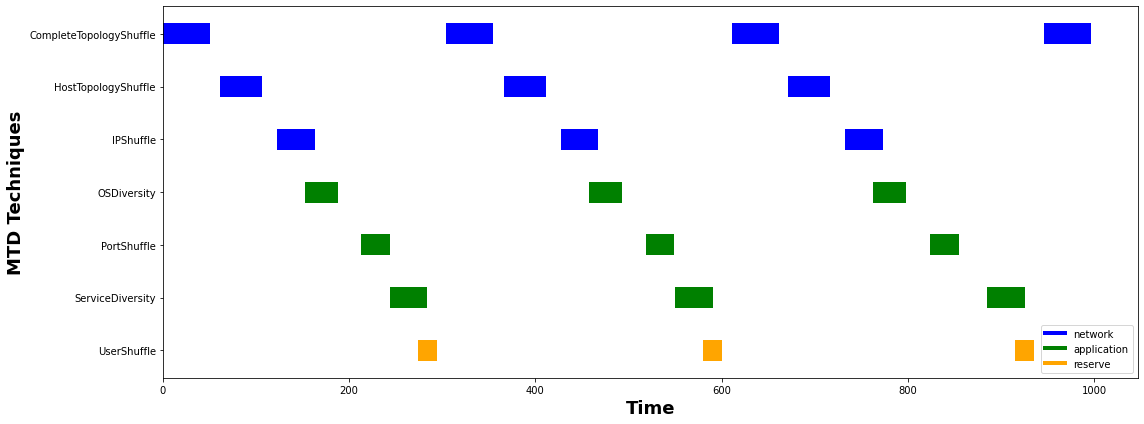

In [5]:
fig, ax = plt.subplots(1, figsize=(16, 6))

colors = ['blue', 'green', 'orange']
mtd_action_legend = []
mtd_action_legend_name = []
for i, v in enumerate(mtd_operation_record['executed_at'].unique()):
    mtd_operation_record.loc[mtd_operation_record['executed_at'] == v, 'color'] = colors[i]
    mtd_action_legend.append(Line2D([0], [0], color=colors[i], lw=4))
    mtd_action_legend_name.append(v)

ax.barh(mtd_operation_record['name'].astype(str), mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.4, color=mtd_operation_record['color'] )
ax.legend(mtd_action_legend, mtd_action_legend_name, loc='lower right')
plt.gca().invert_yaxis()

custom_lines_mtd = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='orange', lw=4)]

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.savefig('data_analysis/mtd_record_' + scheme + '.png')
plt.show()

In [6]:
attack_operation_record.head()

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,10.000000,10.000000,-1,0,0,0,None,[],None,None
1,ENUM_HOST,10.000000,25.000000,15.000000,-1,0,0,0,None,[],None,None
2,SCAN_PORT,25.000000,45.000000,20.000000,0,1,0,0,None,[],None,None
3,EXPLOIT_VULN,45.000000,50.264152,5.264152,0,1,0,0,None,[],network,CompleteTopologyShuffle
4,SCAN_HOST,52.264152,62.264152,10.000000,-1,0,0,0,None,[],None,None


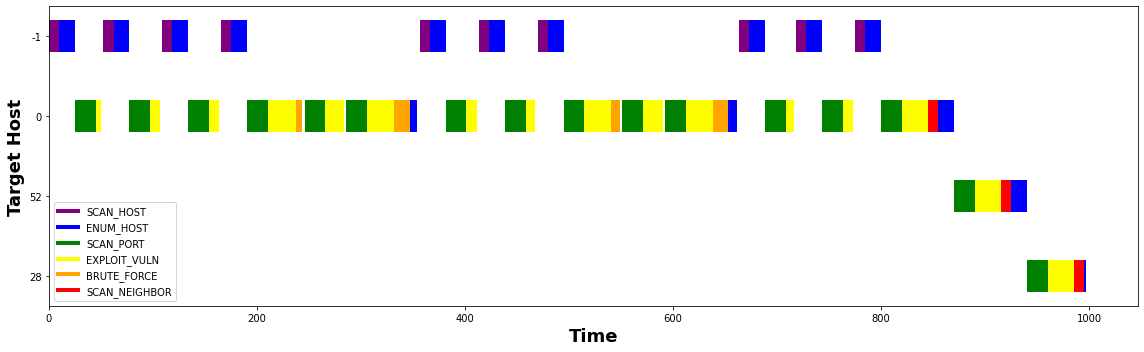

In [7]:
fig2, ax2 = plt.subplots(1, figsize=(16, 5))

colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red']
attack_action_legend = []
attack_action_legend_name = []
for i, v in enumerate(attack_operation_record['name'].unique()):
    attack_operation_record.loc[attack_operation_record.name == v, 'color'] = colors[i]
    attack_action_legend.append(Line2D([0], [0], color=colors[i], lw=4))
    attack_action_legend_name.append(v)

ax2.barh(attack_operation_record['current_host'].astype(str), attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.4, color=attack_operation_record['color'] )

ax2.legend(attack_action_legend, attack_action_legend_name, loc='lower left')
plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Target Host', weight='bold', fontsize=18)
fig2.tight_layout()
plt.savefig('data_analysis/attack_action_record.png')
plt.show()

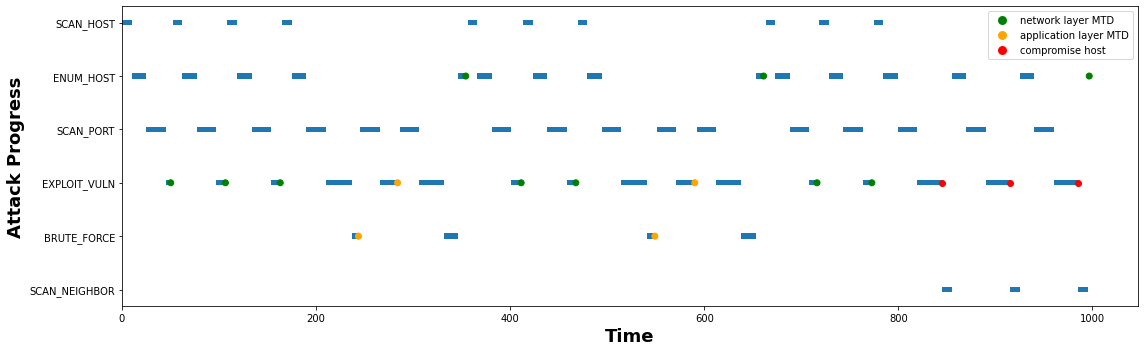

In [8]:
fig4, ax4 = plt.subplots(1, figsize=(16, 5))
ax4.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1, zorder=1)


interrupted_record = attack_operation_record[attack_operation_record['interrupted_in']!='None']
interrupted_record['color'] = np.where(interrupted_record['interrupted_in']=='network', 'green', 'orange')
ax4.scatter(interrupted_record['finish_time'], interrupted_record['name'], color=interrupted_record['color'], zorder=3)


compromise_record = attack_operation_record[attack_operation_record['compromise_host'] != 'None']
ax4.scatter(compromise_record['finish_time'], compromise_record['name'], color='red', zorder=2)


custom_lines_attack = [Line2D([0], [0], marker='o',color='w', markerfacecolor='green', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='orange', markersize=10),
                       Line2D([0], [0], marker='o',color='w', markerfacecolor='red', markersize=10),]

ax4.legend(custom_lines_attack, ['network layer MTD', 'application layer MTD', 'compromise host'], loc='upper right')

plt.gca().invert_yaxis()
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig4.tight_layout()
plt.savefig('data_analysis/attack_record.png')
plt.show()

In [9]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color


In [10]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color
53,EXPLOIT_VULN,819.680564,845.049526,25.368962,0,10,11,0,0,"[Eryn, Shellie, Patty, Dynah, Clemmy]",None,None,yellow
57,EXPLOIT_VULN,890.049526,915.099480,25.049954,52,1,14,1,52,"[Gwen, Kipp, Amalle, Cindie, Mirabel]",None,None,yellow
61,EXPLOIT_VULN,960.099480,985.217985,25.118505,28,1,34,2,28,"[Margaretta, Saraann, Barby]",None,None,yellow


In [11]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != 'None')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by,color
